In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

seas = 'djf'

In [2]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/dataout/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [3]:
ds_TE = xr.open_dataset(diri+"combined_wave_extreme_EastCoast_"+seas+".nc")
ds_TE

<xarray.Dataset>
Dimensions:    (list: 50, ncl1: 50)
Dimensions without coordinates: list, ncl1
Data variables:
    composite  (list) float32 ...
    median     (ncl1) float32 ...
    alpha      (list) float32 ...

In [4]:
combination = ["er_er_drydry",
               "er_er_wet_wet",
               
               "er_klv_drydry",
               "er_klv_drywet",
               "er_klv_wetdry",
               "er_klv_wetwet",
               
               "er_mjo_drydry",
               "er_mjo_drywet",
               "er_mjo_wetdry",
               "er_mjo_wetwet",
               
               "er_mrg_drydry",
               "er_mrg_drywet",
               "er_mrg_wetdry",
               "er_mrg_wetwet",
               
               "er_td_drydry",
               "er_td_drywet",
               "er_td_wetdry",
               "er_td_wetwet",
               
               "klv_klv_drydry",
               "klv_klv_wet_wet",
               
               "mjo_klv_drydry",
               "mjo_klv_drywet",
               "mjo_klv_wetdry",
               "mjo_klv_wetwet",
               
               "mjo_mjo_drydry",
               "mjo_mjo_wetwet",   
               
               "mrg_klv_drydry",
               "mrg_klv_drywet",
               "mrg_klv_wetdry",
               "mrg_klv_wetwet",
               
               "mrg_mjo_drydry",
               "mrg_mjo_drywet",
               "mrg_mjo_wetdry",
               "mrg_mjo_wetwet",
               
               "mrg_mrg_drydry",
               "mrg_mrg_wetwet",
               
               "mrg_td_drydry",
               "mrg_td_drywet",
               "mrg_td_wetdry",
               "mrg_td_wetwet",
               
               'td_klv_drydry',
               'td_klv_drywet',
               'td_klv_wetdry',
               'td_klv_wetwet',
               
               'td_mjo_drydry',
               'td_mjo_drywet',
               'td_mjo_wetdry',
               'td_mjo_wetwet',
               
               'td_td_drydry',
               'td_td_wetwet',
               
              ]

len(combination)

50

In [5]:
c = ds_TE["composite"]
a = ds_TE["alpha"]
ndays = ds_TE["composite"].attrs["ndays"]
ndays
# attrs["ndays"]

array([ 988,  551,  495,   78,  301,   48,  400,  182,  278,   87,  446,
         87,  242,   46,  298,  196,  177,  100, 1343,  188,  629,   93,
        213,   33, 1179,  407,  593,   73,  110,   15,  543,  174,  111,
         35, 1157,  226,  431,  208,   35,   46,  415,   50,  260,   34,
        361,  117,  228,   70,  773,  491], dtype=int32)

In [6]:
cols = ["er-wet", "klv-wet", "mjo-wet", "mrg-wet", "td-wet", "er-dry", "klv-dry", "mjo-dry", "mrg-dry", "td-dry"]

In [7]:
rows = cols


In [8]:
df = []
counter = 0
for i in combination:
    val = c.values[counter]
    df.append(val)
    counter+=1
    
df = pd.DataFrame([df,combination]).transpose()
df = df.rename(columns={0:"prec",1:"combination"})

df["prec"] = df["prec"].astype(float)
df["prec"]

0     0.381771
1     1.431343
2     0.138545
3     0.439615
4     1.025282
5     0.714375
6     0.257175
7     0.753626
8     0.370036
9     4.729655
10    0.307534
11    0.788276
12    0.991859
13    0.745435
14    0.230134
15    0.874745
16    0.774915
17    3.429000
18    0.485115
19    0.547181
20    0.054515
21    0.368710
22    1.770845
23    2.078182
24    0.319924
25    1.853514
26    0.289123
27    0.000000
28    0.311727
29    0.000000
30    0.252597
31    1.182414
32    0.308919
33    1.959429
34    0.592740
35    0.910354
36    0.556914
37    1.153990
38    0.000000
39    2.236304
40    0.330506
41    0.000000
42    0.659423
43    1.008529
44    0.474931
45    1.465385
46    0.451184
47    4.408714
48    0.532316
49    1.536415
Name: prec, dtype: float64

In [9]:
df_a = []
counter = 0
for i in combination:
    val = a.values[counter]
    df_a.append(val)
    counter+=1
    
df_a = pd.DataFrame([df_a,combination]).transpose()
df_a = df_a.rename(columns={0:"alpha",1:"combination"})

df_a["alpha"] = df_a["alpha"].astype(float)
df_a["alpha"]

0     1.0
1     0.0
2     1.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    0.0
20    1.0
21    0.0
22    1.0
23    0.0
24    1.0
25    1.0
26    1.0
27    1.0
28    0.0
29    1.0
30    1.0
31    0.0
32    0.0
33    0.0
34    1.0
35    0.0
36    0.0
37    0.0
38    1.0
39    0.0
40    1.0
41    1.0
42    0.0
43    0.0
44    1.0
45    0.0
46    0.0
47    1.0
48    1.0
49    1.0
Name: alpha, dtype: float64

In [10]:
df_n = []
counter = 0
for i in combination:
    val = ndays[counter]
    df_n.append(val)
    counter+=1
    
df_n = pd.DataFrame([df_n,combination]).transpose()
df_n = df_n.rename(columns={0:"ndays",1:"combination"})

df_n["ndays"] = df_n["ndays"].astype(float)
df_n

,ndays,combination
0,988.0,er_er_drydry
1,551.0,er_er_wet_wet
2,495.0,er_klv_drydry
3,78.0,er_klv_drywet
4,301.0,er_klv_wetdry
5,48.0,er_klv_wetwet
6,400.0,er_mjo_drydry
7,182.0,er_mjo_drywet
8,278.0,er_mjo_wetdry
9,87.0,er_mjo_wetwet


In [11]:
# df["prec"] = [df["prec"].iloc[i].astype(float) for i in range(len(df["prec"]))]

In [12]:
x = pd.DataFrame(columns=cols, index=rows)
a = pd.DataFrame(columns=cols, index=rows)
n = pd.DataFrame(columns=cols, index=rows)

In [13]:

x.loc["er-dry","er-dry"] = df["prec"].loc[0].astype(float)
x.loc["er-wet","er-wet"] = df["prec"].loc[1].astype(float)

#erklv
x.loc["er-dry","klv-dry"] = df["prec"].loc[2].astype(float)
x.loc["er-dry","klv-wet"] = df["prec"].loc[3].astype(float)
x.loc["er-wet","klv-dry"] = df["prec"].loc[4].astype(float)
x.loc["er-wet","klv-wet"] = df["prec"].loc[5].astype(float)

x.loc["klv-dry","er-dry"] = df["prec"].loc[2].astype(float)
x.loc["klv-wet","er-dry"] = df["prec"].loc[3].astype(float)
x.loc["klv-dry","er-wet"] = df["prec"].loc[4].astype(float)
x.loc["klv-wet","er-wet"] = df["prec"].loc[5].astype(float)

#ermjo
x.loc["er-dry","mjo-dry"] = df["prec"].loc[6].astype(float)
x.loc["er-dry","mjo-wet"] = df["prec"].loc[7].astype(float)
x.loc["er-wet","mjo-dry"] = df["prec"].loc[8].astype(float)
x.loc["er-wet","mjo-wet"] = df["prec"].loc[9].astype(float)

x.loc["mjo-dry","er-dry"] = df["prec"].loc[6].astype(float)
x.loc["mjo-wet","er-dry"] = df["prec"].loc[7].astype(float)
x.loc["mjo-dry","er-wet"] = df["prec"].loc[8].astype(float)
x.loc["mjo-wet","er-wet"] = df["prec"].loc[9].astype(float)

#ermrg
x.loc["er-dry","mrg-dry"] = df["prec"].loc[10].astype(float)
x.loc["er-dry","mrg-wet"] = df["prec"].loc[11].astype(float)
x.loc["er-wet","mrg-dry"] = df["prec"].loc[12].astype(float)
x.loc["er-wet","mrg-wet"] = df["prec"].loc[13].astype(float)

x.loc["mrg-dry","er-dry"] = df["prec"].loc[10].astype(float)
x.loc["mrg-wet","er-dry"] = df["prec"].loc[11].astype(float)
x.loc["mrg-dry","er-wet"] = df["prec"].loc[12].astype(float)
x.loc["mrg-wet","er-wet"] = df["prec"].loc[13].astype(float)

#ertd
x.loc["er-dry","td-dry"] = df["prec"].loc[14].astype(float)
x.loc["er-dry","td-wet"] = df["prec"].loc[15].astype(float)
x.loc["er-wet","td-dry"] = df["prec"].loc[16].astype(float)
x.loc["er-wet","td-wet"] = df["prec"].loc[17].astype(float)

x.loc["td-dry","er-dry"] = df["prec"].loc[14].astype(float)
x.loc["td-wet","er-dry"] = df["prec"].loc[15].astype(float)
x.loc["td-dry","er-wet"] = df["prec"].loc[16].astype(float)
x.loc["td-wet","er-wet"] = df["prec"].loc[17].astype(float)


#klvklv
x.loc["klv-dry","klv-dry"] = df["prec"].loc[18].astype(float)
x.loc["klv-wet","klv-wet"] = df["prec"].loc[19].astype(float)

#mjoklv
x.loc["mjo-dry","klv-dry"] = df["prec"].loc[20].astype(float)
x.loc["mjo-dry","klv-wet"] = df["prec"].loc[21].astype(float)
x.loc["mjo-wet","klv-dry"] = df["prec"].loc[22].astype(float)
x.loc["mjo-wet","klv-wet"] = df["prec"].loc[23].astype(float)

x.loc["klv-dry","mjo-dry"] = df["prec"].loc[20].astype(float)
x.loc["klv-wet","mjo-dry"] = df["prec"].loc[21].astype(float)
x.loc["klv-dry","mjo-wet"] = df["prec"].loc[22].astype(float)
x.loc["klv-wet","mjo-wet"] = df["prec"].loc[23].astype(float)

#mjomjo
x.loc["mjo-dry","mjo-dry"] = df["prec"].loc[24].astype(float)
x.loc["mjo-wet","mjo-wet"] = df["prec"].loc[25].astype(float)

#mrgklv
x.loc["mrg-dry","klv-dry"] = df["prec"].loc[26].astype(float)
x.loc["mrg-dry","klv-wet"] = df["prec"].loc[27].astype(float)
x.loc["mrg-wet","klv-dry"] = df["prec"].loc[28].astype(float)
x.loc["mrg-wet","klv-wet"] = df["prec"].loc[29].astype(float)

x.loc["klv-dry","mrg-dry"] = df["prec"].loc[26].astype(float)
x.loc["klv-wet","mrg-dry"] = df["prec"].loc[27].astype(float)
x.loc["klv-dry","mrg-wet"] = df["prec"].loc[28].astype(float)
x.loc["klv-wet","mrg-wet"] = df["prec"].loc[29].astype(float)

#mrgmjo
x.loc["mrg-dry","mjo-dry"] = df["prec"].loc[30].astype(float)
x.loc["mrg-dry","mjo-wet"] = df["prec"].loc[31].astype(float)
x.loc["mrg-wet","mjo-dry"] = df["prec"].loc[32].astype(float)
x.loc["mrg-wet","mjo-wet"] = df["prec"].loc[33].astype(float)

x.loc["mjo-dry","mrg-dry"] = df["prec"].loc[30].astype(float)
x.loc["mjo-wet","mrg-dry"] = df["prec"].loc[31].astype(float)
x.loc["mjo-dry","mrg-wet"] = df["prec"].loc[32].astype(float)
x.loc["mjo-wet","mrg-wet"] = df["prec"].loc[33].astype(float)

#mrgmrg
x.loc["mrg-dry","mrg-dry"] = df["prec"].loc[34].astype(float)
x.loc["mrg-wet","mrg-wet"] = df["prec"].loc[35].astype(float)

#mrgtd
x.loc["mrg-dry","td-dry"] = df["prec"].loc[36].astype(float)
x.loc["mrg-dry","td-wet"] = df["prec"].loc[37].astype(float)
x.loc["mrg-wet","td-dry"] = df["prec"].loc[38].astype(float)
x.loc["mrg-wet","td-wet"] = df["prec"].loc[39].astype(float)

x.loc["td-dry","mrg-dry"] = df["prec"].loc[36].astype(float)
x.loc["td-wet","mrg-dry"] = df["prec"].loc[37].astype(float)
x.loc["td-dry","mrg-wet"] = df["prec"].loc[38].astype(float)
x.loc["td-wet","mrg-wet"] = df["prec"].loc[39].astype(float)

#tdklv
x.loc["td-dry","klv-dry"] = df["prec"].loc[40].astype(float)
x.loc["td-dry","klv-wet"] = df["prec"].loc[41].astype(float)
x.loc["td-wet","klv-dry"] = df["prec"].loc[42].astype(float)
x.loc["td-wet","klv-wet"] = df["prec"].loc[43].astype(float)

x.loc["klv-dry","td-dry"] = df["prec"].loc[40].astype(float)
x.loc["klv-wet","td-dry"] = df["prec"].loc[41].astype(float)
x.loc["klv-dry","td-wet"] = df["prec"].loc[42].astype(float)
x.loc["klv-wet","td-wet"] = df["prec"].loc[43].astype(float)

#tdmjo
x.loc["td-dry","mjo-dry"] = df["prec"].loc[44].astype(float)
x.loc["td-dry","mjo-wet"] = df["prec"].loc[45].astype(float)
x.loc["td-wet","mjo-dry"] = df["prec"].loc[46].astype(float)
x.loc["td-wet","mjo-wet"] = df["prec"].loc[47].astype(float)

x.loc["mjo-dry","td-dry"] = df["prec"].loc[44].astype(float)
x.loc["mjo-wet","td-dry"] = df["prec"].loc[45].astype(float)
x.loc["mjo-dry","td-wet"] = df["prec"].loc[46].astype(float)
x.loc["mjo-wet","td-wet"] = df["prec"].loc[47].astype(float)

#tdtd
x.loc["td-dry","td-dry"] = df["prec"].loc[48].astype(float)
x.loc["td-wet","td-wet"] = df["prec"].loc[49].astype(float)

In [14]:

a.loc["er-dry","er-dry"] = df_a["alpha"].loc[0].astype(float)
a.loc["er-wet","er-wet"] = df_a["alpha"].loc[1].astype(float)

#erklv
a.loc["er-dry","klv-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["er-dry","klv-wet"] = df_a["alpha"].loc[3].astype(float)
a.loc["er-wet","klv-dry"] = df_a["alpha"].loc[4].astype(float)
a.loc["er-wet","klv-wet"] = df_a["alpha"].loc[5].astype(float)

a.loc["klv-dry","er-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["klv-wet","er-dry"] = df_a["alpha"].loc[3].astype(float)
a.loc["klv-dry","er-wet"] = df_a["alpha"].loc[4].astype(float)
a.loc["klv-wet","er-wet"] = df_a["alpha"].loc[5].astype(float)

#ermjo
a.loc["er-dry","mjo-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["er-dry","mjo-wet"] = df_a["alpha"].loc[7].astype(float)
a.loc["er-wet","mjo-dry"] = df_a["alpha"].loc[8].astype(float)
a.loc["er-wet","mjo-wet"] = df_a["alpha"].loc[9].astype(float)

a.loc["mjo-dry","er-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["mjo-wet","er-dry"] = df_a["alpha"].loc[7].astype(float)
a.loc["mjo-dry","er-wet"] = df_a["alpha"].loc[8].astype(float)
a.loc["mjo-wet","er-wet"] = df_a["alpha"].loc[9].astype(float)

#ermrg
a.loc["er-dry","mrg-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["er-dry","mrg-wet"] = df_a["alpha"].loc[11].astype(float)
a.loc["er-wet","mrg-dry"] = df_a["alpha"].loc[12].astype(float)
a.loc["er-wet","mrg-wet"] = df_a["alpha"].loc[13].astype(float)

a.loc["mrg-dry","er-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["mrg-wet","er-dry"] = df_a["alpha"].loc[11].astype(float)
a.loc["mrg-dry","er-wet"] = df_a["alpha"].loc[12].astype(float)
a.loc["mrg-wet","er-wet"] = df_a["alpha"].loc[13].astype(float)

#ertd
a.loc["er-dry","td-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["er-dry","td-wet"] = df_a["alpha"].loc[15].astype(float)
a.loc["er-wet","td-dry"] = df_a["alpha"].loc[16].astype(float)
a.loc["er-wet","td-wet"] = df_a["alpha"].loc[17].astype(float)

a.loc["td-dry","er-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["td-wet","er-dry"] = df_a["alpha"].loc[15].astype(float)
a.loc["td-dry","er-wet"] = df_a["alpha"].loc[16].astype(float)
a.loc["td-wet","er-wet"] = df_a["alpha"].loc[17].astype(float)


#klvklv
a.loc["klv-dry","klv-dry"] = df_a["alpha"].loc[18].astype(float)
a.loc["klv-wet","klv-wet"] = df_a["alpha"].loc[19].astype(float)

#mjoklv
a.loc["mjo-dry","klv-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["mjo-dry","klv-wet"] = df_a["alpha"].loc[21].astype(float)
a.loc["mjo-wet","klv-dry"] = df_a["alpha"].loc[22].astype(float)
a.loc["mjo-wet","klv-wet"] = df_a["alpha"].loc[23].astype(float)

a.loc["klv-dry","mjo-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["klv-wet","mjo-dry"] = df_a["alpha"].loc[21].astype(float)
a.loc["klv-dry","mjo-wet"] = df_a["alpha"].loc[22].astype(float)
a.loc["klv-wet","mjo-wet"] = df_a["alpha"].loc[23].astype(float)

#mjomjo
a.loc["mjo-dry","mjo-dry"] = df_a["alpha"].loc[24].astype(float)
a.loc["mjo-wet","mjo-wet"] = df_a["alpha"].loc[25].astype(float)

#mrgklv
a.loc["mrg-dry","klv-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["mrg-dry","klv-wet"] = df_a["alpha"].loc[27].astype(float)
a.loc["mrg-wet","klv-dry"] = df_a["alpha"].loc[28].astype(float)
a.loc["mrg-wet","klv-wet"] = df_a["alpha"].loc[29].astype(float)

a.loc["klv-dry","mrg-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["klv-wet","mrg-dry"] = df_a["alpha"].loc[27].astype(float)
a.loc["klv-dry","mrg-wet"] = df_a["alpha"].loc[28].astype(float)
a.loc["klv-wet","mrg-wet"] = df_a["alpha"].loc[29].astype(float)

#mrgmjo
a.loc["mrg-dry","mjo-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mrg-dry","mjo-wet"] = df_a["alpha"].loc[31].astype(float)
a.loc["mrg-wet","mjo-dry"] = df_a["alpha"].loc[32].astype(float)
a.loc["mrg-wet","mjo-wet"] = df_a["alpha"].loc[33].astype(float)

a.loc["mjo-dry","mrg-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mjo-wet","mrg-dry"] = df_a["alpha"].loc[31].astype(float)
a.loc["mjo-dry","mrg-wet"] = df_a["alpha"].loc[32].astype(float)
a.loc["mjo-wet","mrg-wet"] = df_a["alpha"].loc[33].astype(float)

#mrgmrg
a.loc["mrg-dry","mrg-dry"] = df_a["alpha"].loc[34].astype(float)
a.loc["mrg-wet","mrg-wet"] = df_a["alpha"].loc[35].astype(float)

#mrgtd
a.loc["mrg-dry","td-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["mrg-dry","td-wet"] = df_a["alpha"].loc[37].astype(float)
a.loc["mrg-wet","td-dry"] = df_a["alpha"].loc[38].astype(float)
a.loc["mrg-wet","td-wet"] = df_a["alpha"].loc[39].astype(float)

a.loc["td-dry","mrg-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["td-wet","mrg-dry"] = df_a["alpha"].loc[37].astype(float)
a.loc["td-dry","mrg-wet"] = df_a["alpha"].loc[38].astype(float)
a.loc["td-wet","mrg-wet"] = df_a["alpha"].loc[39].astype(float)

#tdklv
a.loc["td-dry","klv-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["td-dry","klv-wet"] = df_a["alpha"].loc[41].astype(float)
a.loc["td-wet","klv-dry"] = df_a["alpha"].loc[42].astype(float)
a.loc["td-wet","klv-wet"] = df_a["alpha"].loc[43].astype(float)

a.loc["klv-dry","td-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["klv-wet","td-dry"] = df_a["alpha"].loc[41].astype(float)
a.loc["klv-dry","td-wet"] = df_a["alpha"].loc[42].astype(float)
a.loc["klv-wet","td-wet"] = df_a["alpha"].loc[43].astype(float)

#tdmjo
a.loc["td-dry","mjo-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["td-dry","mjo-wet"] = df_a["alpha"].loc[45].astype(float)
a.loc["td-wet","mjo-dry"] = df_a["alpha"].loc[46].astype(float)
a.loc["td-wet","mjo-wet"] = df_a["alpha"].loc[47].astype(float)

a.loc["mjo-dry","td-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["mjo-wet","td-dry"] = df_a["alpha"].loc[45].astype(float)
a.loc["mjo-dry","td-wet"] = df_a["alpha"].loc[46].astype(float)
a.loc["mjo-wet","td-wet"] = df_a["alpha"].loc[47].astype(float)

#tdtd
a.loc["td-dry","td-dry"] = df_a["alpha"].loc[48].astype(float)
a.loc["td-wet","td-wet"] = df_a["alpha"].loc[49].astype(float)

In [15]:

n.loc["er-dry","er-dry"] = df_n["ndays"].loc[0].astype(float)
n.loc["er-wet","er-wet"] = df_n["ndays"].loc[1].astype(float)

#erklv
n.loc["er-dry","klv-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["er-dry","klv-wet"] = df_n["ndays"].loc[3].astype(float)
n.loc["er-wet","klv-dry"] = df_n["ndays"].loc[4].astype(float)
n.loc["er-wet","klv-wet"] = df_n["ndays"].loc[5].astype(float)

n.loc["klv-dry","er-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["klv-wet","er-dry"] = df_n["ndays"].loc[3].astype(float)
n.loc["klv-dry","er-wet"] = df_n["ndays"].loc[4].astype(float)
n.loc["klv-wet","er-wet"] = df_n["ndays"].loc[5].astype(float)

#ermjo
n.loc["er-dry","mjo-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["er-dry","mjo-wet"] = df_n["ndays"].loc[7].astype(float)
n.loc["er-wet","mjo-dry"] = df_n["ndays"].loc[8].astype(float)
n.loc["er-wet","mjo-wet"] = df_n["ndays"].loc[9].astype(float)

n.loc["mjo-dry","er-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["mjo-wet","er-dry"] = df_n["ndays"].loc[7].astype(float)
n.loc["mjo-dry","er-wet"] = df_n["ndays"].loc[8].astype(float)
n.loc["mjo-wet","er-wet"] = df_n["ndays"].loc[9].astype(float)

#ermrg
n.loc["er-dry","mrg-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["er-dry","mrg-wet"] = df_n["ndays"].loc[11].astype(float)
n.loc["er-wet","mrg-dry"] = df_n["ndays"].loc[12].astype(float)
n.loc["er-wet","mrg-wet"] = df_n["ndays"].loc[13].astype(float)

n.loc["mrg-dry","er-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["mrg-wet","er-dry"] = df_n["ndays"].loc[11].astype(float)
n.loc["mrg-dry","er-wet"] = df_n["ndays"].loc[12].astype(float)
n.loc["mrg-wet","er-wet"] = df_n["ndays"].loc[13].astype(float)

#ertd
n.loc["er-dry","td-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["er-dry","td-wet"] = df_n["ndays"].loc[15].astype(float)
n.loc["er-wet","td-dry"] = df_n["ndays"].loc[16].astype(float)
n.loc["er-wet","td-wet"] = df_n["ndays"].loc[17].astype(float)

n.loc["td-dry","er-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["td-wet","er-dry"] = df_n["ndays"].loc[15].astype(float)
n.loc["td-dry","er-wet"] = df_n["ndays"].loc[16].astype(float)
n.loc["td-wet","er-wet"] = df_n["ndays"].loc[17].astype(float)


#klvklv
n.loc["klv-dry","klv-dry"] = df_n["ndays"].loc[18].astype(float)
n.loc["klv-wet","klv-wet"] = df_n["ndays"].loc[19].astype(float)

#mjoklv
n.loc["mjo-dry","klv-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["mjo-dry","klv-wet"] = df_n["ndays"].loc[21].astype(float)
n.loc["mjo-wet","klv-dry"] = df_n["ndays"].loc[22].astype(float)
n.loc["mjo-wet","klv-wet"] = df_n["ndays"].loc[23].astype(float)

n.loc["klv-dry","mjo-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["klv-wet","mjo-dry"] = df_n["ndays"].loc[21].astype(float)
n.loc["klv-dry","mjo-wet"] = df_n["ndays"].loc[22].astype(float)
n.loc["klv-wet","mjo-wet"] = df_n["ndays"].loc[23].astype(float)

#mjomjo
n.loc["mjo-dry","mjo-dry"] = df_n["ndays"].loc[24].astype(float)
n.loc["mjo-wet","mjo-wet"] = df_n["ndays"].loc[25].astype(float)

#mrgklv
n.loc["mrg-dry","klv-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["mrg-dry","klv-wet"] = df_n["ndays"].loc[27].astype(float)
n.loc["mrg-wet","klv-dry"] = df_n["ndays"].loc[28].astype(float)
n.loc["mrg-wet","klv-wet"] = df_n["ndays"].loc[29].astype(float)

n.loc["klv-dry","mrg-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["klv-wet","mrg-dry"] = df_n["ndays"].loc[27].astype(float)
n.loc["klv-dry","mrg-wet"] = df_n["ndays"].loc[28].astype(float)
n.loc["klv-wet","mrg-wet"] = df_n["ndays"].loc[29].astype(float)

#mrgmjo
n.loc["mrg-dry","mjo-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mrg-dry","mjo-wet"] = df_n["ndays"].loc[31].astype(float)
n.loc["mrg-wet","mjo-dry"] = df_n["ndays"].loc[32].astype(float)
n.loc["mrg-wet","mjo-wet"] = df_n["ndays"].loc[33].astype(float)

n.loc["mjo-dry","mrg-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mjo-wet","mrg-dry"] = df_n["ndays"].loc[31].astype(float)
n.loc["mjo-dry","mrg-wet"] = df_n["ndays"].loc[32].astype(float)
n.loc["mjo-wet","mrg-wet"] = df_n["ndays"].loc[33].astype(float)

#mrgmrg
n.loc["mrg-dry","mrg-dry"] = df_n["ndays"].loc[34].astype(float)
n.loc["mrg-wet","mrg-wet"] = df_n["ndays"].loc[35].astype(float)

#mrgtd
n.loc["mrg-dry","td-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["mrg-dry","td-wet"] = df_n["ndays"].loc[37].astype(float)
n.loc["mrg-wet","td-dry"] = df_n["ndays"].loc[38].astype(float)
n.loc["mrg-wet","td-wet"] = df_n["ndays"].loc[39].astype(float)

n.loc["td-dry","mrg-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["td-wet","mrg-dry"] = df_n["ndays"].loc[37].astype(float)
n.loc["td-dry","mrg-wet"] = df_n["ndays"].loc[38].astype(float)
n.loc["td-wet","mrg-wet"] = df_n["ndays"].loc[39].astype(float)

#tdklv
n.loc["td-dry","klv-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["td-dry","klv-wet"] = df_n["ndays"].loc[41].astype(float)
n.loc["td-wet","klv-dry"] = df_n["ndays"].loc[42].astype(float)
n.loc["td-wet","klv-wet"] = df_n["ndays"].loc[43].astype(float)

n.loc["klv-dry","td-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["klv-wet","td-dry"] = df_n["ndays"].loc[41].astype(float)
n.loc["klv-dry","td-wet"] = df_n["ndays"].loc[42].astype(float)
n.loc["klv-wet","td-wet"] = df_n["ndays"].loc[43].astype(float)

#tdmjo
n.loc["td-dry","mjo-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["td-dry","mjo-wet"] = df_n["ndays"].loc[45].astype(float)
n.loc["td-wet","mjo-dry"] = df_n["ndays"].loc[46].astype(float)
n.loc["td-wet","mjo-wet"] = df_n["ndays"].loc[47].astype(float)

n.loc["mjo-dry","td-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["mjo-wet","td-dry"] = df_n["ndays"].loc[45].astype(float)
n.loc["mjo-dry","td-wet"] = df_n["ndays"].loc[46].astype(float)
n.loc["mjo-wet","td-wet"] = df_n["ndays"].loc[47].astype(float)

#tdtd
n.loc["td-dry","td-dry"] = df_n["ndays"].loc[48].astype(float)
n.loc["td-wet","td-wet"] = df_n["ndays"].loc[49].astype(float)

In [16]:
if seas=='mam':
    x
#     x = x.iloc[:,x.columns != 'mjo-wet']
# #     x = x.iloc[x.index != 'mjo-wet',:]
#     x = x.iloc[:,x.columns != 'er-wet']
#     x = x.iloc[x.index != 'er-wet',:]
# #     x = x.iloc[:,x.columns != 'mrg-wet']
# #     x = x.iloc[x.index != 'mrg-wet',:]
# #     x = x.iloc[:,x.columns != 'td-wet']
# #     x = x.iloc[x.index != 'td-wet',:]
    
    
# #     a = a.iloc[:,a.columns != 'mjo-wet']
# #     a = a.iloc[a.index != 'mjo-wet',:]
#     a = a.iloc[:,a.columns != 'er-wet']
#     a = a.iloc[a.index != 'er-wet',:]
# #     a = a.iloc[:,a.columns != 'mrg-wet']
# #     a = a.iloc[a.index != 'mrg-wet',:]
# #     a = a.iloc[:,a.columns != 'td-wet']
# #     a = a.iloc[a.index != 'td-wet',:]
    
    
# #     n = n.iloc[:,n.columns != 'mjo-wet']
# #     n = n.iloc[n.index != 'mjo-wet',:]
#     n = n.iloc[:,n.columns != 'er-wet']
#     n = n.iloc[n.index != 'er-wet',:]
# #     n = n.iloc[:,n.columns != 'mrg-wet']
# #     n = n.iloc[n.index != 'mrg-wet',:]
# #     n = n.iloc[:,n.columns != 'td-wet']
# #     n = n.iloc[n.index != 'td-wet',:]

elif seas=='djf':
    
#     x = x.iloc[:,x.columns != 'mjo-wet']
#     x = x.iloc[x.index != 'mjo-wet',:]
#     x = x.iloc[:,x.columns != 'er-wet']
#     x = x.iloc[x.index != 'er-wet',:]
    x = x.iloc[:,x.columns != 'mrg-wet']
    x = x.iloc[x.index != 'mrg-wet',:]
#     x = x.iloc[:,x.columns != 'td-wet']
#     x = x.iloc[x.index != 'td-wet',:]
    
    
#     a = a.iloc[:,a.columns != 'mjo-wet']
#     a = a.iloc[a.index != 'mjo-wet',:]
#     a = a.iloc[:,a.columns != 'er-wet']
#     a = a.iloc[a.index != 'er-wet',:]
    a = a.iloc[:,a.columns != 'mrg-wet']
    a = a.iloc[a.index != 'mrg-wet',:]
#     a = a.iloc[:,a.columns != 'td-wet']
#     a = a.iloc[a.index != 'td-wet',:]
    
    
#     n = n.iloc[:,n.columns != 'mjo-wet']
#     n = n.iloc[n.index != 'mjo-wet',:]
#     n = n.iloc[:,n.columns != 'er-wet']
#     n = n.iloc[n.index != 'er-wet',:]
    n = n.iloc[:,n.columns != 'mrg-wet']
    n = n.iloc[n.index != 'mrg-wet',:]
#     n = n.iloc[:,n.columns != 'td-wet']
#     n = n.iloc[n.index != 'td-wet',:]


In [17]:
x

,er-wet,klv-wet,mjo-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1.431343,0.714375,4.729655,3.429,NaN,1.025282,0.370036,0.991859,0.774915
klv-wet,0.714375,0.547181,2.078182,1.008529,0.439615,NaN,0.36871,0.0,0.0
mjo-wet,4.729655,2.078182,1.853514,4.408714,0.753626,1.770845,NaN,1.182414,1.465385
td-wet,3.429,1.008529,4.408714,1.536415,0.874745,0.659423,0.451184,1.15399,NaN
er-dry,NaN,0.439615,0.753626,0.874745,0.381771,0.138545,0.257175,0.307534,0.230134
klv-dry,1.025282,NaN,1.770845,0.659423,0.138545,0.485115,0.054515,0.289123,0.330506
mjo-dry,0.370036,0.36871,NaN,0.451184,0.257175,0.054515,0.319924,0.252597,0.474931
mrg-dry,0.991859,0.0,1.182414,1.15399,0.307534,0.289123,0.252597,0.59274,0.556914
td-dry,0.774915,0.0,1.465385,NaN,0.230134,0.330506,0.474931,0.556914,0.532316


In [18]:
n

,er-wet,klv-wet,mjo-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,551.0,48.0,87.0,100.0,NaN,301.0,278.0,242.0,177.0
klv-wet,48.0,188.0,33.0,34.0,78.0,NaN,93.0,73.0,50.0
mjo-wet,87.0,33.0,407.0,70.0,182.0,213.0,NaN,174.0,117.0
td-wet,100.0,34.0,70.0,491.0,196.0,260.0,228.0,208.0,NaN
er-dry,NaN,78.0,182.0,196.0,988.0,495.0,400.0,446.0,298.0
klv-dry,301.0,NaN,213.0,260.0,495.0,1343.0,629.0,593.0,415.0
mjo-dry,278.0,93.0,NaN,228.0,400.0,629.0,1179.0,543.0,361.0
mrg-dry,242.0,73.0,174.0,208.0,446.0,593.0,543.0,1157.0,431.0
td-dry,177.0,50.0,117.0,NaN,298.0,415.0,361.0,431.0,773.0


In [19]:
for i in x.columns:
    x[i] = x[i].astype(float)
    
# x["er-wet"]

In [20]:
for i in a.columns:
    a[i] = a[i].astype(float)
    
# a["er-wet"]

for i in n.columns:
    n[i] = n[i].astype(float)
    
# a["ER"]

In [21]:

if seas=='djf':
    x.columns = ["ER", "Kelvin", "MJO",  "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    x.index   = ["ER", "Kelvin", "MJO",  "TD-type" ,  "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    a.columns = ["ER", "Kelvin", "MJO",  "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    a.index   = ["ER", "Kelvin", "MJO",   "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    n.columns = ["ER", "Kelvin", "MJO", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    n.index   = ["ER", "Kelvin", "MJO", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

elif seas=='mam':
    x.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    x.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" ,  "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    a.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    a.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    n.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    n.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    
a.iloc[0,:]

ER         0.0
Kelvin     0.0
MJO        1.0
TD-type    1.0
ER         NaN
Kelvin     0.0
MJO        1.0
MRG        0.0
TD-type    0.0
Name: ER, dtype: float64

In [22]:
x_sig = x.round(1).where(a==0,x.round(1).astype(str)+"*")
# x_sig = x_sig.where(x_sig!=pd.NaN,"-")
x_sig

,ER,Kelvin,MJO,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,1.4,0.7,4.7*,3.4*,nan*,1.0,0.4*,1.0,0.8
Kelvin,0.7,0.5,2.1,1.0,0.4,nan*,0.4,0.0*,0.0*
MJO,4.7*,2.1,1.9*,4.4*,0.8,1.8*,nan*,1.2,1.5
TD-type,3.4*,1.0,4.4*,1.5*,0.9,0.7,0.5,1.2,nan*
ER,nan*,0.4,0.8,0.9,0.4*,0.1*,0.3*,0.3*,0.2*
Kelvin,1.0,nan*,1.8*,0.7,0.1*,0.5*,0.1*,0.3*,0.3*
MJO,0.4*,0.4,nan*,0.5,0.3*,0.1*,0.3*,0.3*,0.5*
MRG,1.0,0.0*,1.2,1.2,0.3*,0.3*,0.3*,0.6*,0.6
TD-type,0.8,0.0*,1.5,nan*,0.2*,0.3*,0.5*,0.6,0.5*


In [23]:
nint = n.astype('Int32')
n_label = "("+nint.astype(str)+")"
# n_label = n_label.where(n_label==np.NaN,"-")

In [25]:
droploc = x.columns.get_loc("Kelvin")
idrop = [i for i, x in enumerate(droploc) if x]
idrop

[1, 5]

In [26]:
p = n/2551 * 100.
p_sig = p.round(1).where(a==0,p.round(1).astype(str)+"*")
p     = p.round(1)
p_sig

,ER,Kelvin,MJO,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,21.6,1.9,3.4*,3.9*,nan*,11.8,10.9*,9.5,6.9
Kelvin,1.9,7.4,1.3,1.3,3.1,nan*,3.6,2.9*,2.0*
MJO,3.4*,1.3,16.0*,2.7*,7.1,8.3*,nan*,6.8,4.6
TD-type,3.9*,1.3,2.7*,19.2*,7.7,10.2,8.9,8.2,nan*
ER,nan*,3.1,7.1,7.7,38.7*,19.4*,15.7*,17.5*,11.7*
Kelvin,11.8,nan*,8.3*,10.2,19.4*,52.6*,24.7*,23.2*,16.3*
MJO,10.9*,3.6,nan*,8.9,15.7*,24.7*,46.2*,21.3*,14.2*
MRG,9.5,2.9*,6.8,8.2,17.5*,23.2*,21.3*,45.4*,16.9
TD-type,6.9,2.0*,4.6,nan*,11.7*,16.3*,14.2*,16.9,30.3*


In [27]:

if seas=='mam':
    th = 26.59
    seasname = "SHAutumn"
elif seas=='djf':
    th = 43.17
    seasname = "SHSummer"

Text(0.5, 1.0, 'Queensland East Coast')

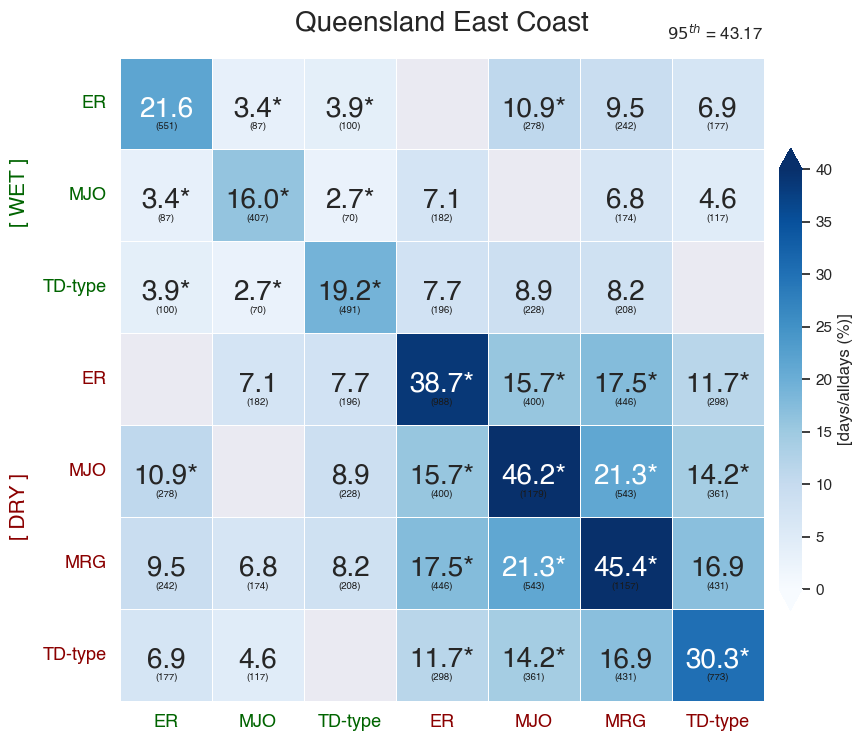

In [32]:
#remember that there are no MRG wet phase detected over CY. So.... we'll adjust that here
p = p.round(1)
p2 = p.drop(p.columns[idrop], axis=1)
p2 = p2.drop(p.index[idrop])

# p = p.round(1)
panno = p_sig.drop(p_sig.columns[idrop], axis=1)
panno = panno.drop(p_sig.index[idrop])
# x_sig2 = x_sig.drop(x_sig.columns[idrop], axis=1)
# x_sig2 = x_sig2.drop(x_sig.index[idrop])



n_label2 = n_label.drop(n_label.columns[idrop], axis=1)
n_label2 = n_label2.drop(n_label.index[idrop])



fig = plt.figure(figsize = [10, 10])

g = sns.heatmap(p2,vmin=0,vmax=40, 
                 annot = panno, 
                 annot_kws={'fontsize':20,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('Blues'), cbar_kws={
                     'label': '[days/alldays (%)]', 'shrink': 0.6, 'pad':0.02, 
                     'extend':'both'},
                square=True,
               
               )


h = sns.heatmap(p2, 
                 annot = n_label2, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'k',
                            },
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

if seas=='djf':
    for label in enumerate(g.xaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        if label[0]>2:
            label[1].set_color("darkred")

    for label in enumerate(g.yaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        label[1].set_rotation(-360)
    #     print(label[0])
        if label[0]>2:
            label[1].set_color("darkred")

    g.text(-1.2,1.8,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.2,5.2,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
    g.text(5.95, -0.2, "$95^{th}$ = "+str(th), bbox=dict(facecolor='white', alpha=0.5))

elif seas=='mam':
    
    for label in enumerate(g.xaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        if label[0]>3:
            label[1].set_color("darkred")

    for label in enumerate(g.yaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        label[1].set_rotation(-360)
    #     print(label[0])
        if label[0]>3:
            label[1].set_color("darkred")

    g.text(-1.2,1.8,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.2,5.2,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
    g.text(6.8, -0.2, "$95^{th}$ = "+str(th), bbox=dict(facecolor='white', alpha=0.5))

g.set_title("Queensland East Coast", fontsize=20, pad=20)

In [33]:
x.columns
# flights_piv.columns

Index(['ER', 'Kelvin', 'MJO', 'TD-type', 'ER', 'Kelvin', 'MJO', 'MRG',
       'TD-type'],
      dtype='object')

In [34]:
fig.savefig(diro+"combined_percentprob_EC."+seas+".png",dpi=300)
fig.savefig(diro+"combined_percentprob_EC."+seas+".eps", dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
